In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [2]:
w = np.array([0,0])
energies = []
weights_w0 = []
weights_w1 = []

x = [i+1 for i in range (50)]
y = [i + np.random.uniform(-1,1) for i in x]
sum_xi = sum(x)
sum_yi = sum(y)

def f(w_0,w_1):
    f_array = [(y[i] - (w_0 + w_1 * x[i])) ** 2 for i in range(len(x))]
    return sum(f_array)
energies.append(f(w[0], w[1]))        

def df_dw0(w_0, w_1):
    df_array = [y[i] - (w_0 + w_1 * x[i]) for i in range(len(x))]
    return -2 * sum(df_array)

def df_dw1(w_0, w_1):
    df_array = [x[i] * (y[i] - (w_0 + w_1 * x[i])) for i in range(len(x))]
    return -2 * sum(df_array)

In [3]:
x_pseudo_inverse = np.linalg.pinv(np.array([np.ones(50), x]))
w_1 = y @ x_pseudo_inverse 
print("Weights by pseudo inverse:", w_1)

Weights by pseudo inverse: [-0.05547878  1.00493429]


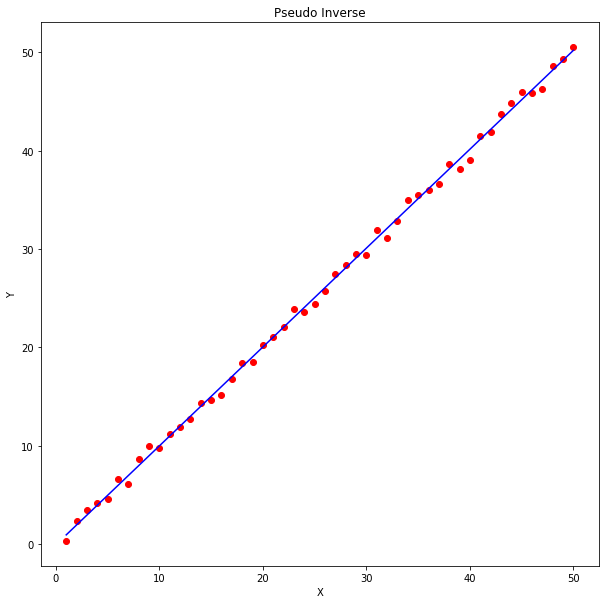

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x, y, c = 'red')
plt.plot(x, [w_1[0] + w_1[1]*i for i in x], c = 'blue')
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Pseudo Inverse')
plt.show()

In [5]:
learning_rate = 0.00001/50
epoch = 0
while(1):
    #print(epoch)
    #df_dw_0 = -2 * (sum_yi - (50 * w[0] + w[1] * sum_xi))
    #df_dw_1 = -2 * sum_xi * (sum_yi - (50 * w[0] + w[1] * sum_xi))
    #print(df_dw_0, df_dw_1)
    gradient = np.array([df_dw0(w[0],w[1]), df_dw1(w[0],w[1])])
    #print("gradient", gradient)
    #print(learning_rate * gradient) 
    w = w - (learning_rate * gradient)
    #print(w)
    try:
        energy = f(w[0],w[1])
        #print(energy)
    except ValueError:
        #print(ValueError)
        break
    epoch+=1
    #print(weight)
    #print(np.linalg.norm(weight - weight_temp))
    if energy >= energies[-1] or epoch == 1000 :
        break
    else:
        energies.append(energy)
        weights_w0.append(w[0])
        weights_w1.append(w[1])

In [6]:
print("Initial Energy: {0}\t Final Energy: {1}".format(energies[0], energies[-1]))
print("Epochs: ",epoch)
print("Final Weights [{0:.10f}, {1:.10f}]".format(w[0], w[1]))

Initial Energy: 43223.39436040503	 Final Energy: 15.842657333078124
Epochs:  1000
Final Weights [0.0293704148, 1.0024132775]


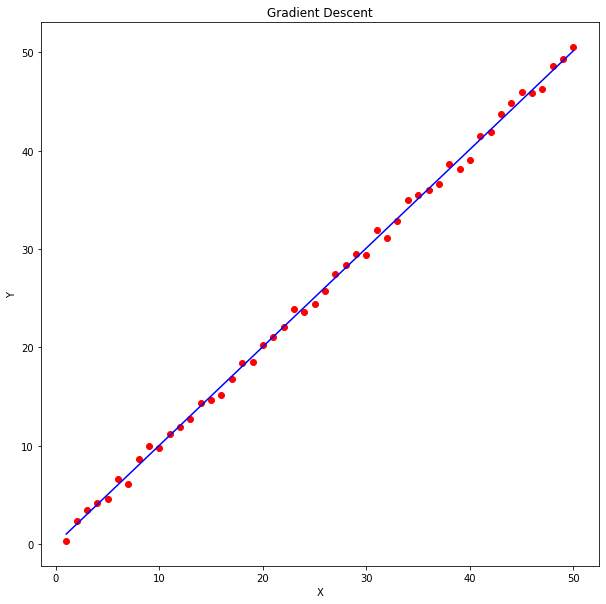

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x, y, c = 'red')
plt.plot(x, [w[0] + w[1]*i for i in x], c = 'blue')
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Gradient Descent')
plt.show()

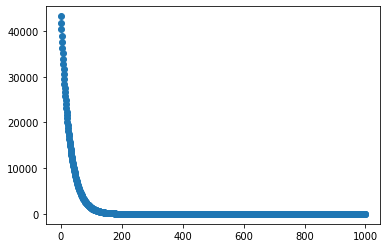

In [8]:
fig, ax = plt.subplots()
plt.scatter([i for i in range(len(energies))], energies)
plt.show()

